<h1>Table of Contents &lt;br&gt;&lt;/br&gt;<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Imports-and-Data-loading" data-toc-modified-id="Imports-and-Data-loading-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Imports and Data loading</a></span></li></ul></li><li><span><a href="#Intraday" data-toc-modified-id="Intraday-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intraday</a></span></li><li><span><a href="#Balancing" data-toc-modified-id="Balancing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Balancing</a></span></li><li><span><a href="#Integrated" data-toc-modified-id="Integrated-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Integrated</a></span></li><li><span><a href="#Plots" data-toc-modified-id="Plots-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Plots</a></span><ul class="toc-item"><li><span><a href="#Style" data-toc-modified-id="Style-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Style</a></span></li><li><span><a href="#Fleet-Utilization" data-toc-modified-id="Fleet-Utilization-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Fleet Utilization</a></span></li></ul></li></ul></div>

## Imports and Data loading

In [2]:
# Display plots inline
%matplotlib inline

# Autoreload all package before excecuting a call
%load_ext autoreload
%autoreload 2

In [4]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from evsim.data import load

In [11]:
pd.set_option('display.float_format', '{:.2f}'.format)

start = "2016-06-01"
end = "2018-01-01"

def read_results(path):
    df = pd.read_csv(path)
    df["timestamp"] = df["timestamp"].apply(lambda x : datetime.fromtimestamp(x))
    df = df.set_index("timestamp") 
    df = df[start:end]
    return df

# Intraday

In [13]:
df_i = read_results("../results/intraday-benchmark.csv")
df_i.sum()/1000

charged_regular_kwh    619.10
charged_vpp_kwh       1461.39
imbalance_kwh            0.00
lost_rentals_eur         0.00
lost_rentals_nb          0.00
profit_eur              65.62
dtype: float64

# Balancing

In [14]:
df_b = read_results("../results/balancing-benchmark.csv")
df_b.sum()/1000

charged_regular_kwh    191.78
charged_vpp_kwh       1888.71
imbalance_kwh            0.00
lost_rentals_eur         0.00
lost_rentals_nb          0.00
profit_eur              98.24
dtype: float64

# Integrated

In [15]:
df_in = read_results("../results/integrated-benchmark.csv")
df_in.sum()/1000

charged_regular_kwh    198.06
charged_vpp_kwh       1882.43
imbalance_kwh            0.00
lost_rentals_eur         0.00
lost_rentals_nb          0.00
profit_eur              97.83
dtype: float64

# Plots

## Style

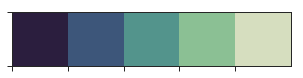

In [101]:
sns.set(rc={'figure.figsize':(10,6)})

sns.set_context("paper")

sns.set_style("white")
sns.set_style("ticks")


palette = sns.cubehelix_palette(5, start=.5, rot=-.75, reverse=True)
sns.set_palette(palette)

sns.palplot(palette)

## Fleet Utilization

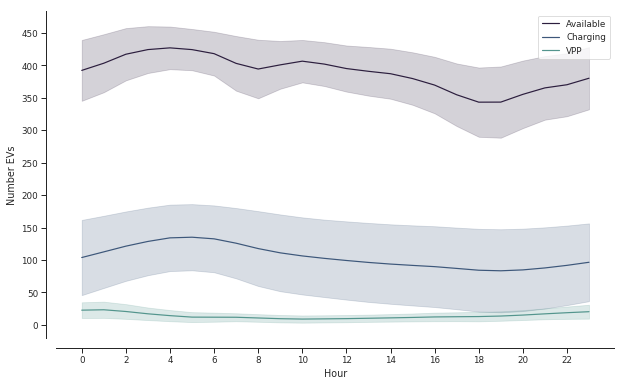

In [102]:
df_stats = read_results("../results/stats-baseline.csv")
df_stats["hour"] = df_stats.index.hour
df_stats.head()

Y = ["available_evs", "charging_evs", "vpp_evs"]
for y in Y:
    label = y.split("_")[0].title()
    label = label.upper() if label == "Vpp" else label
    ax = sns.lineplot(x="hour", y=y, ci="sd", data=df_stats, label=label)
    
    
sns.despine(offset=10)
ax.set(xlabel='Hour', ylabel='Number EVs')
plt.xticks(np.arange(0, 24, 2));
plt.yticks(np.arange(0, 500, 50));
plt.savefig("../results/fig/fleet-utilization.png")